In [3]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)
options(repr.plot.width=14, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




In [6]:
arg01 <- "tenx" #library name: tenx, dropseq, mca
arg02 <- "experiment1/outs/filtered_feature_bc_matrix/" #10X directory, dropseq / mca count matrix
arg03 <- "ex1_analysis" #project name
arg04 <- "ex1.rds"  #output file name for saveRDS function

In [7]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

An object of class Seurat 
14086 features across 2874 samples within 1 assay 
Active assay: RNA (14086 features, 0 variable features)


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


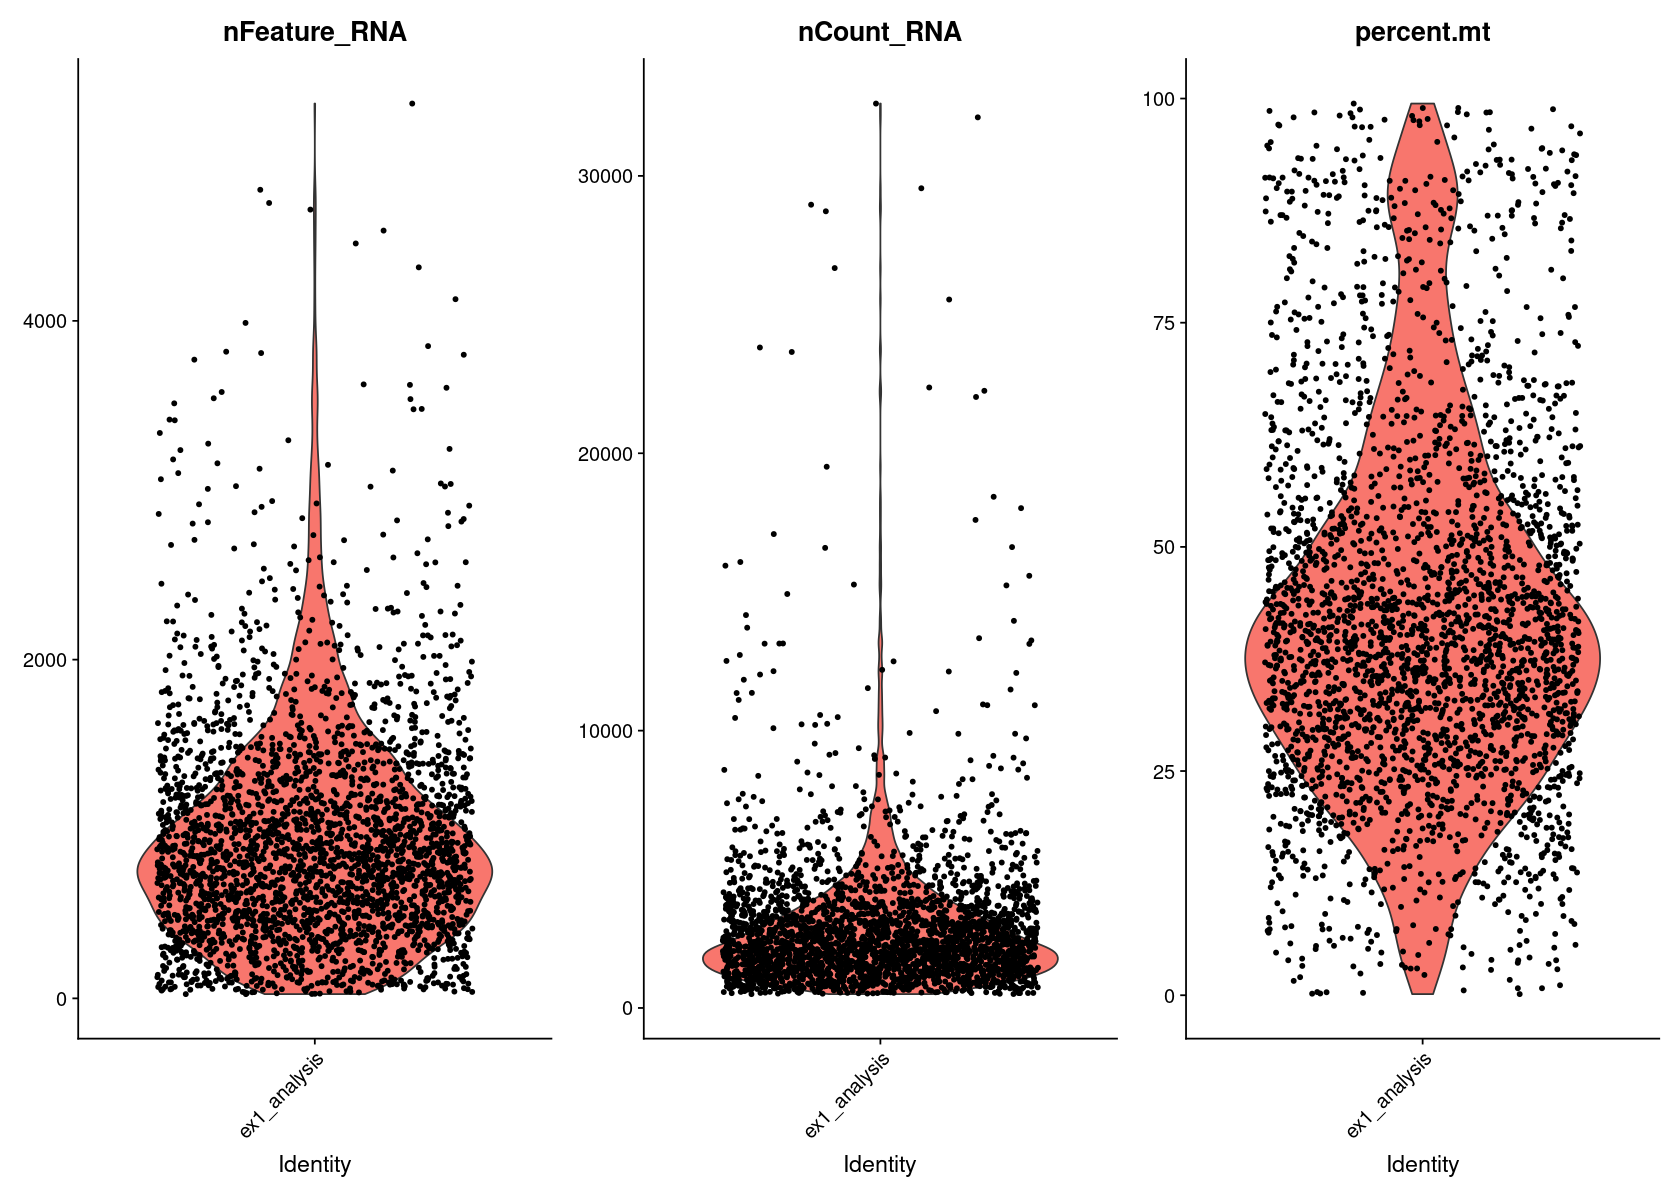

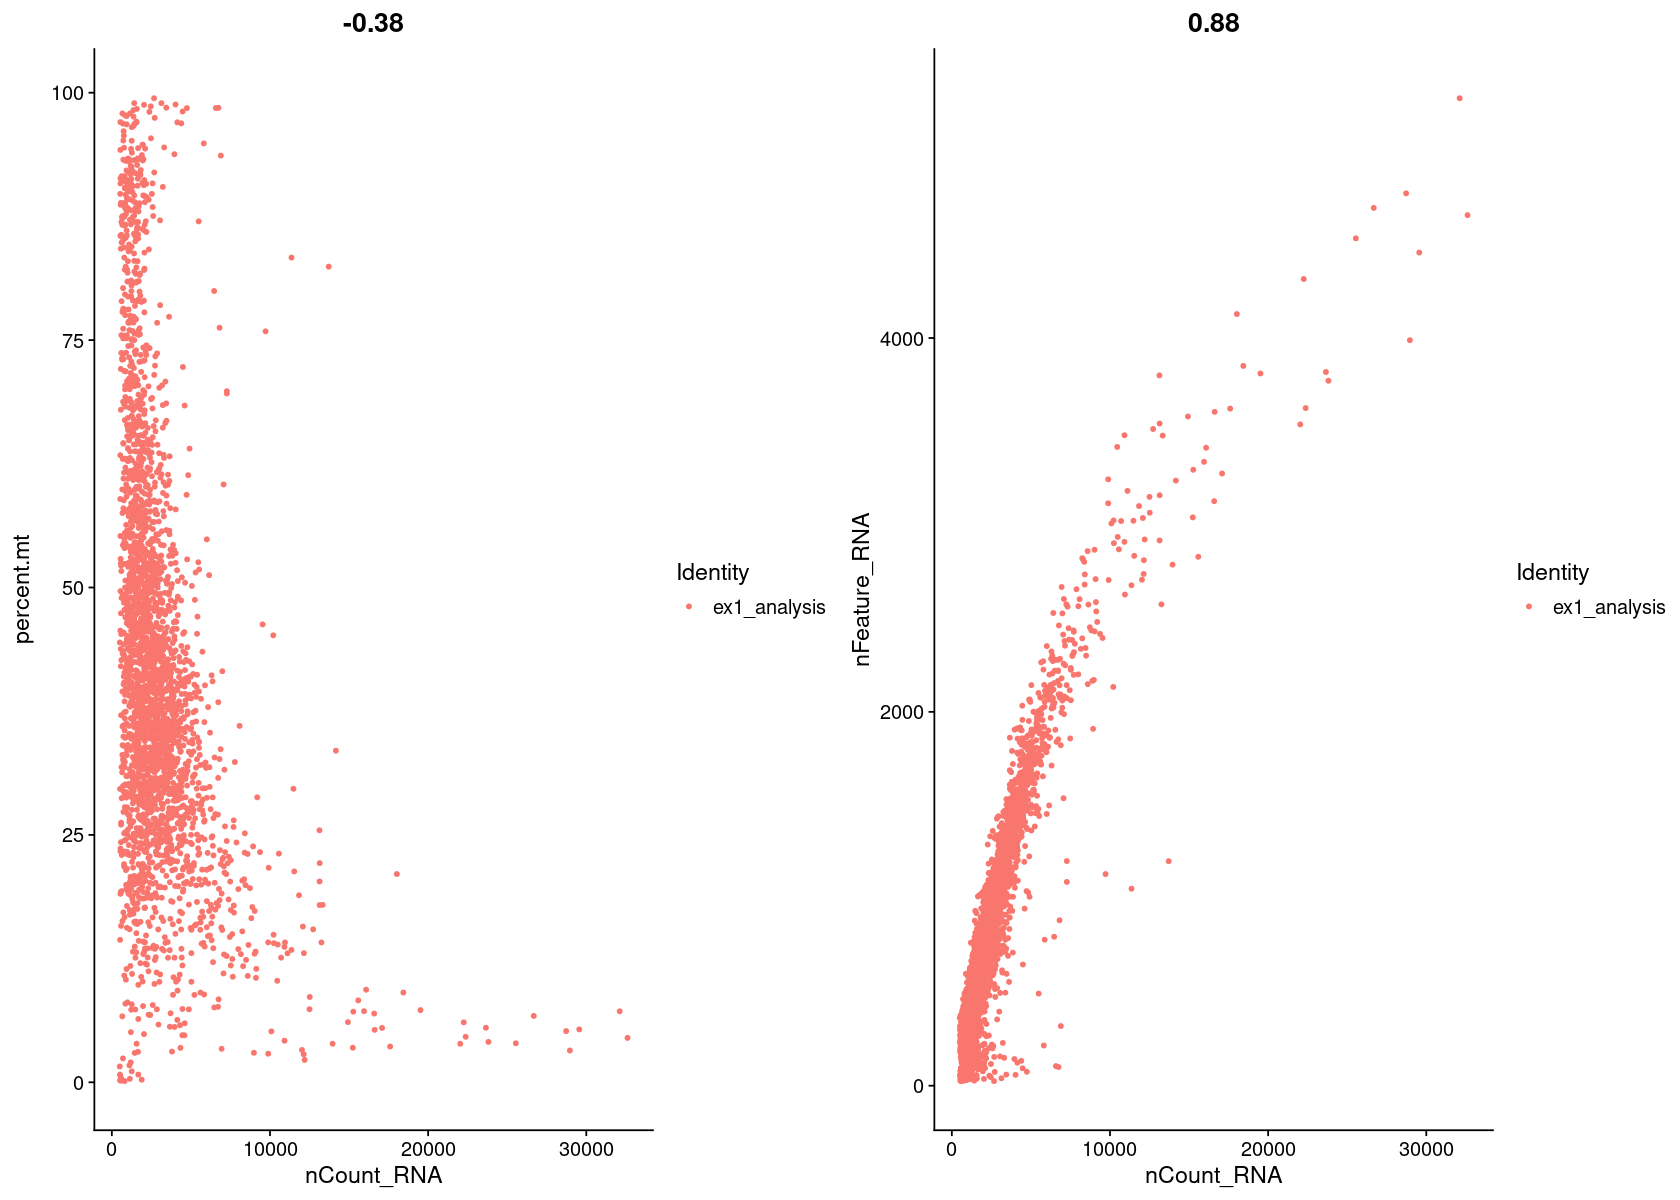

In [9]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^mt-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [10]:
arg05 <- 50 #nFeature_RNA_min
arg06 <- 4000 #nFeature_RNA_max
arg07 <- 10 #nCount_RNA_min
arg08 <- 20000 #nCount_RNA_max
arg09 <- 75 #percent.mt_max

An object of class Seurat 
14086 features across 2598 samples within 1 assay 
Active assay: RNA (14086 features, 0 variable features)


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


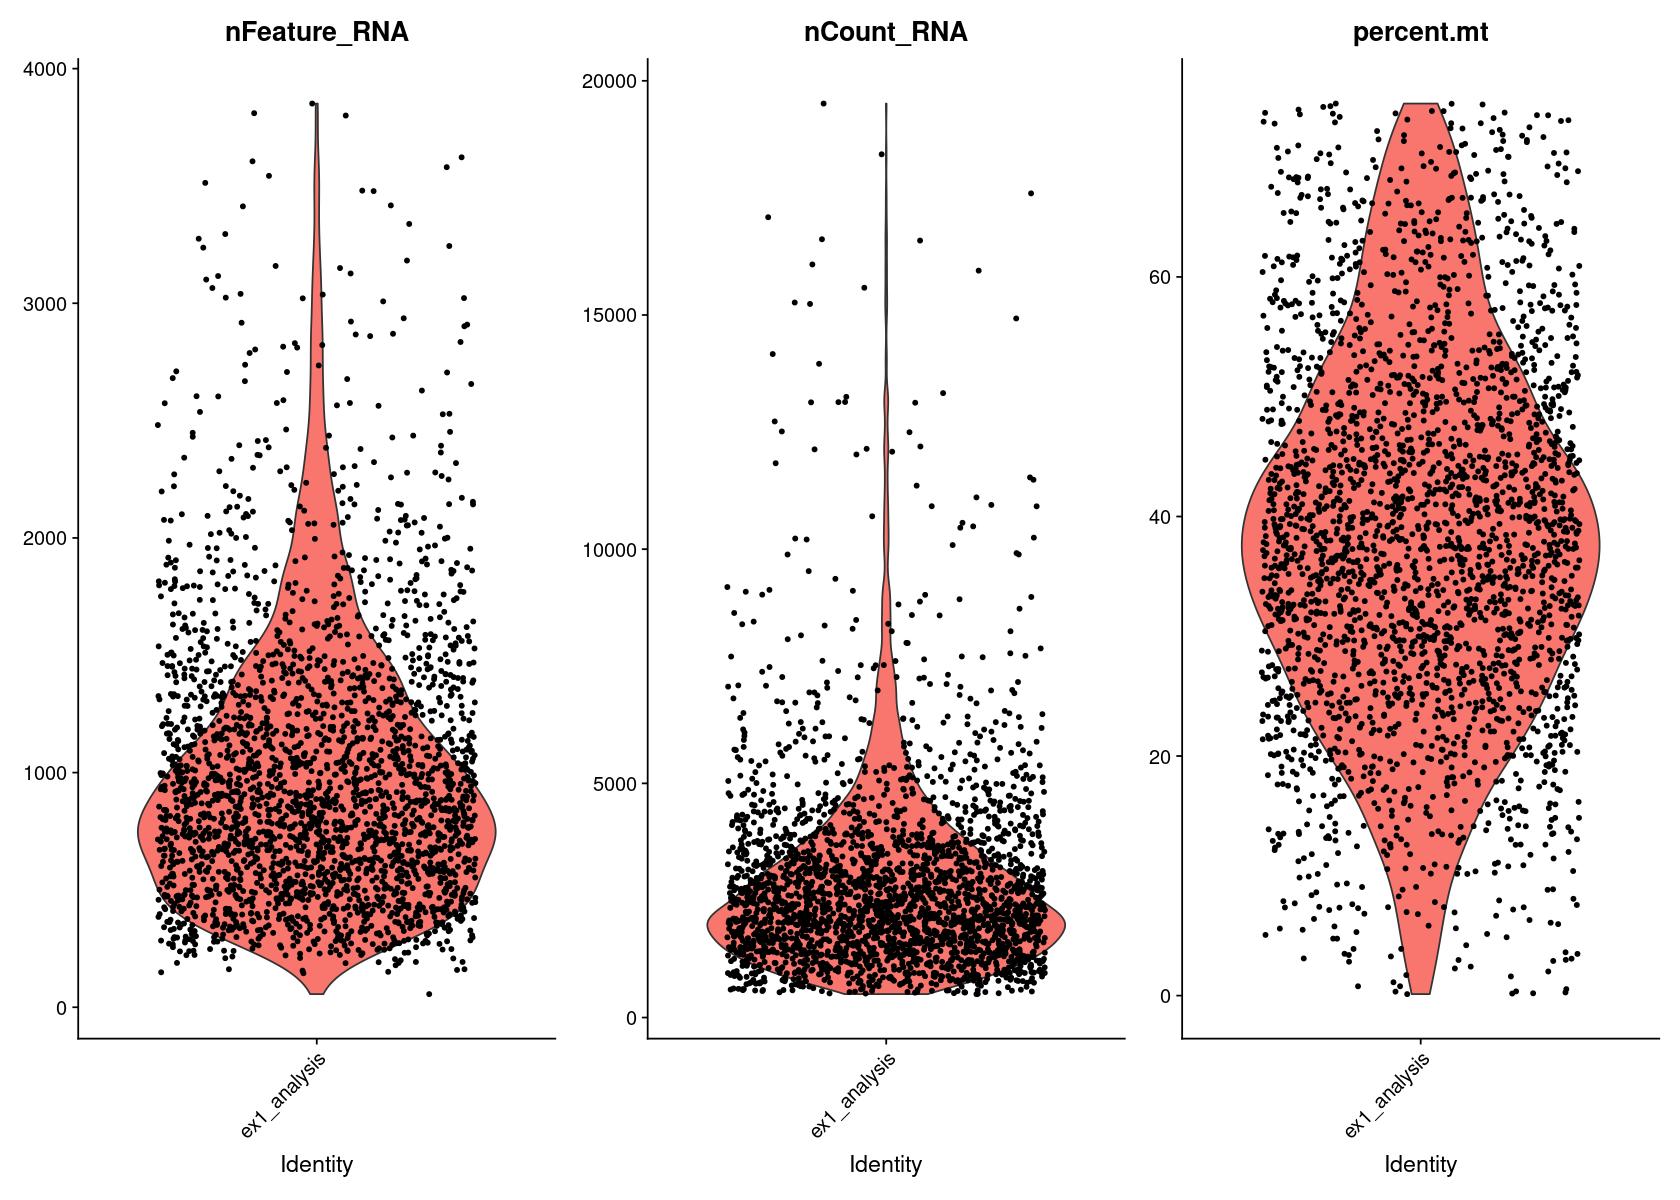

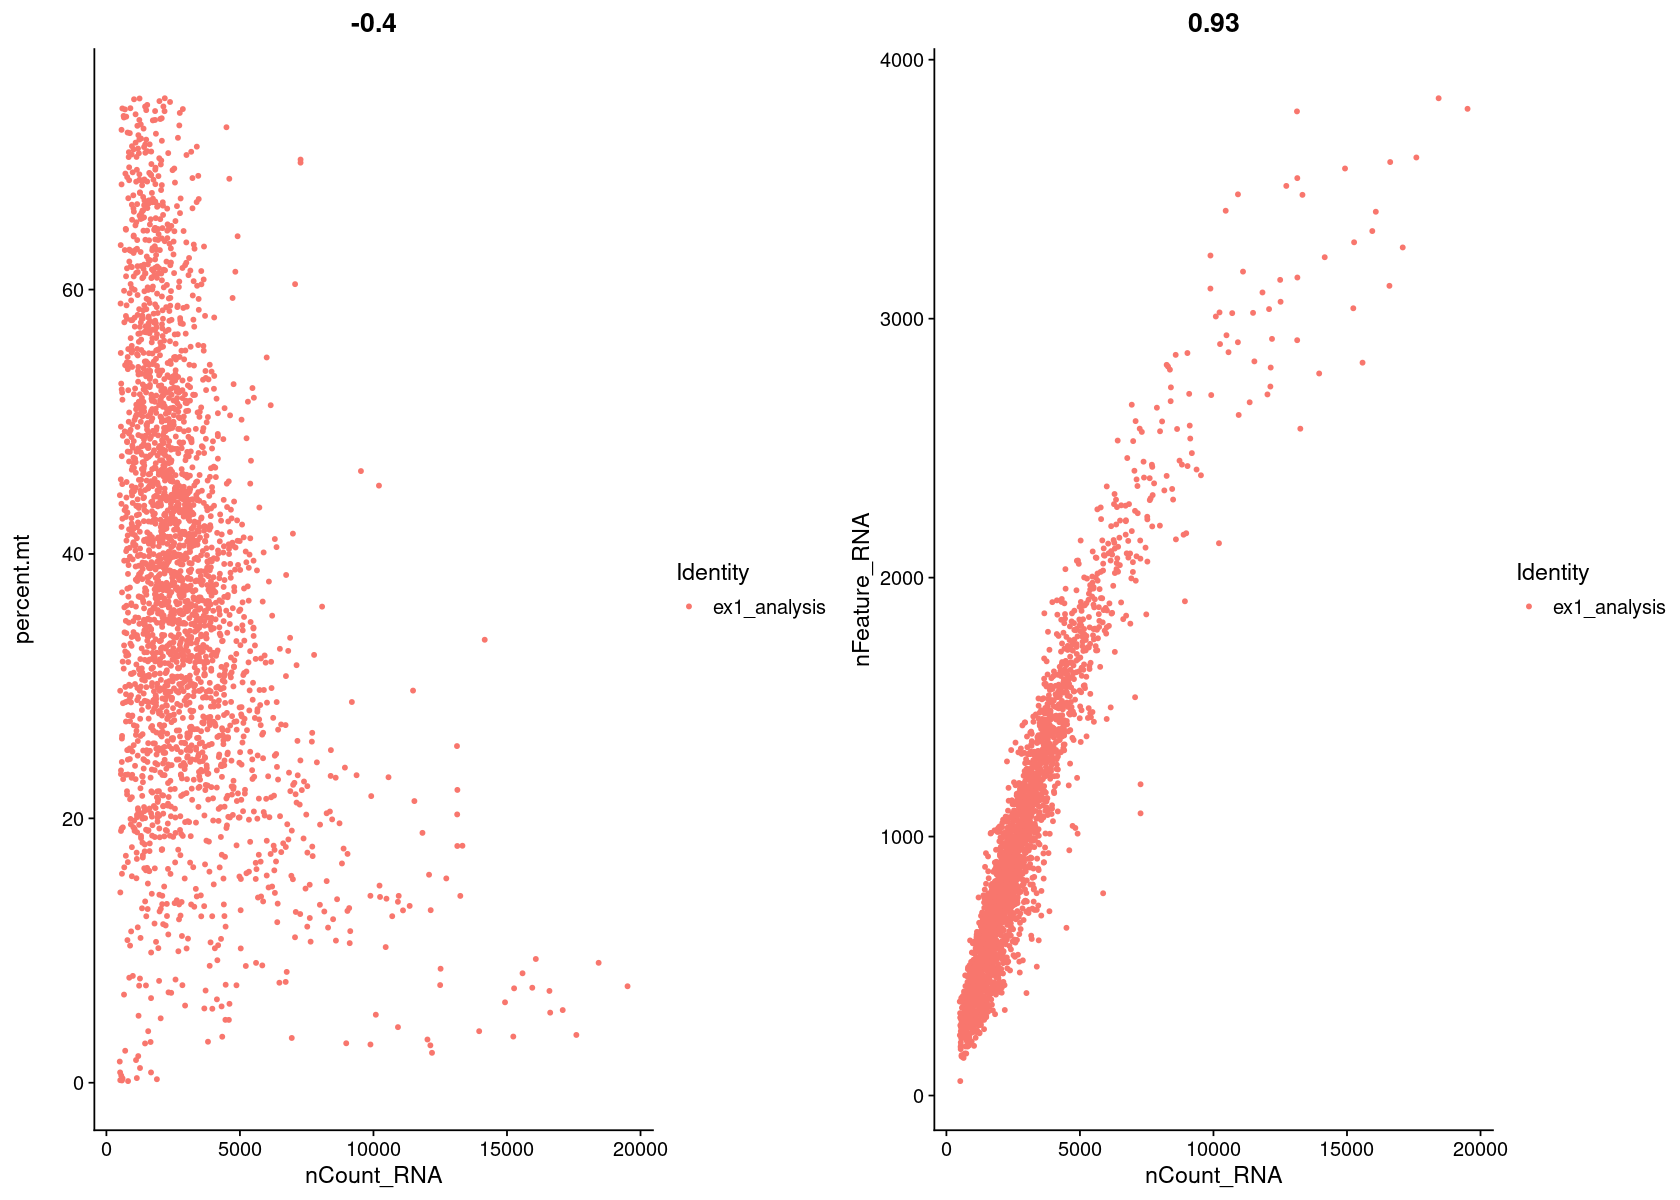

In [11]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”
ERROR while rich displaying an object: Error in grid.Call(C_convert, x, as.integer(whatfrom), as.integer(whatto), :  ビューポートの次元数がゼロです 

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <-

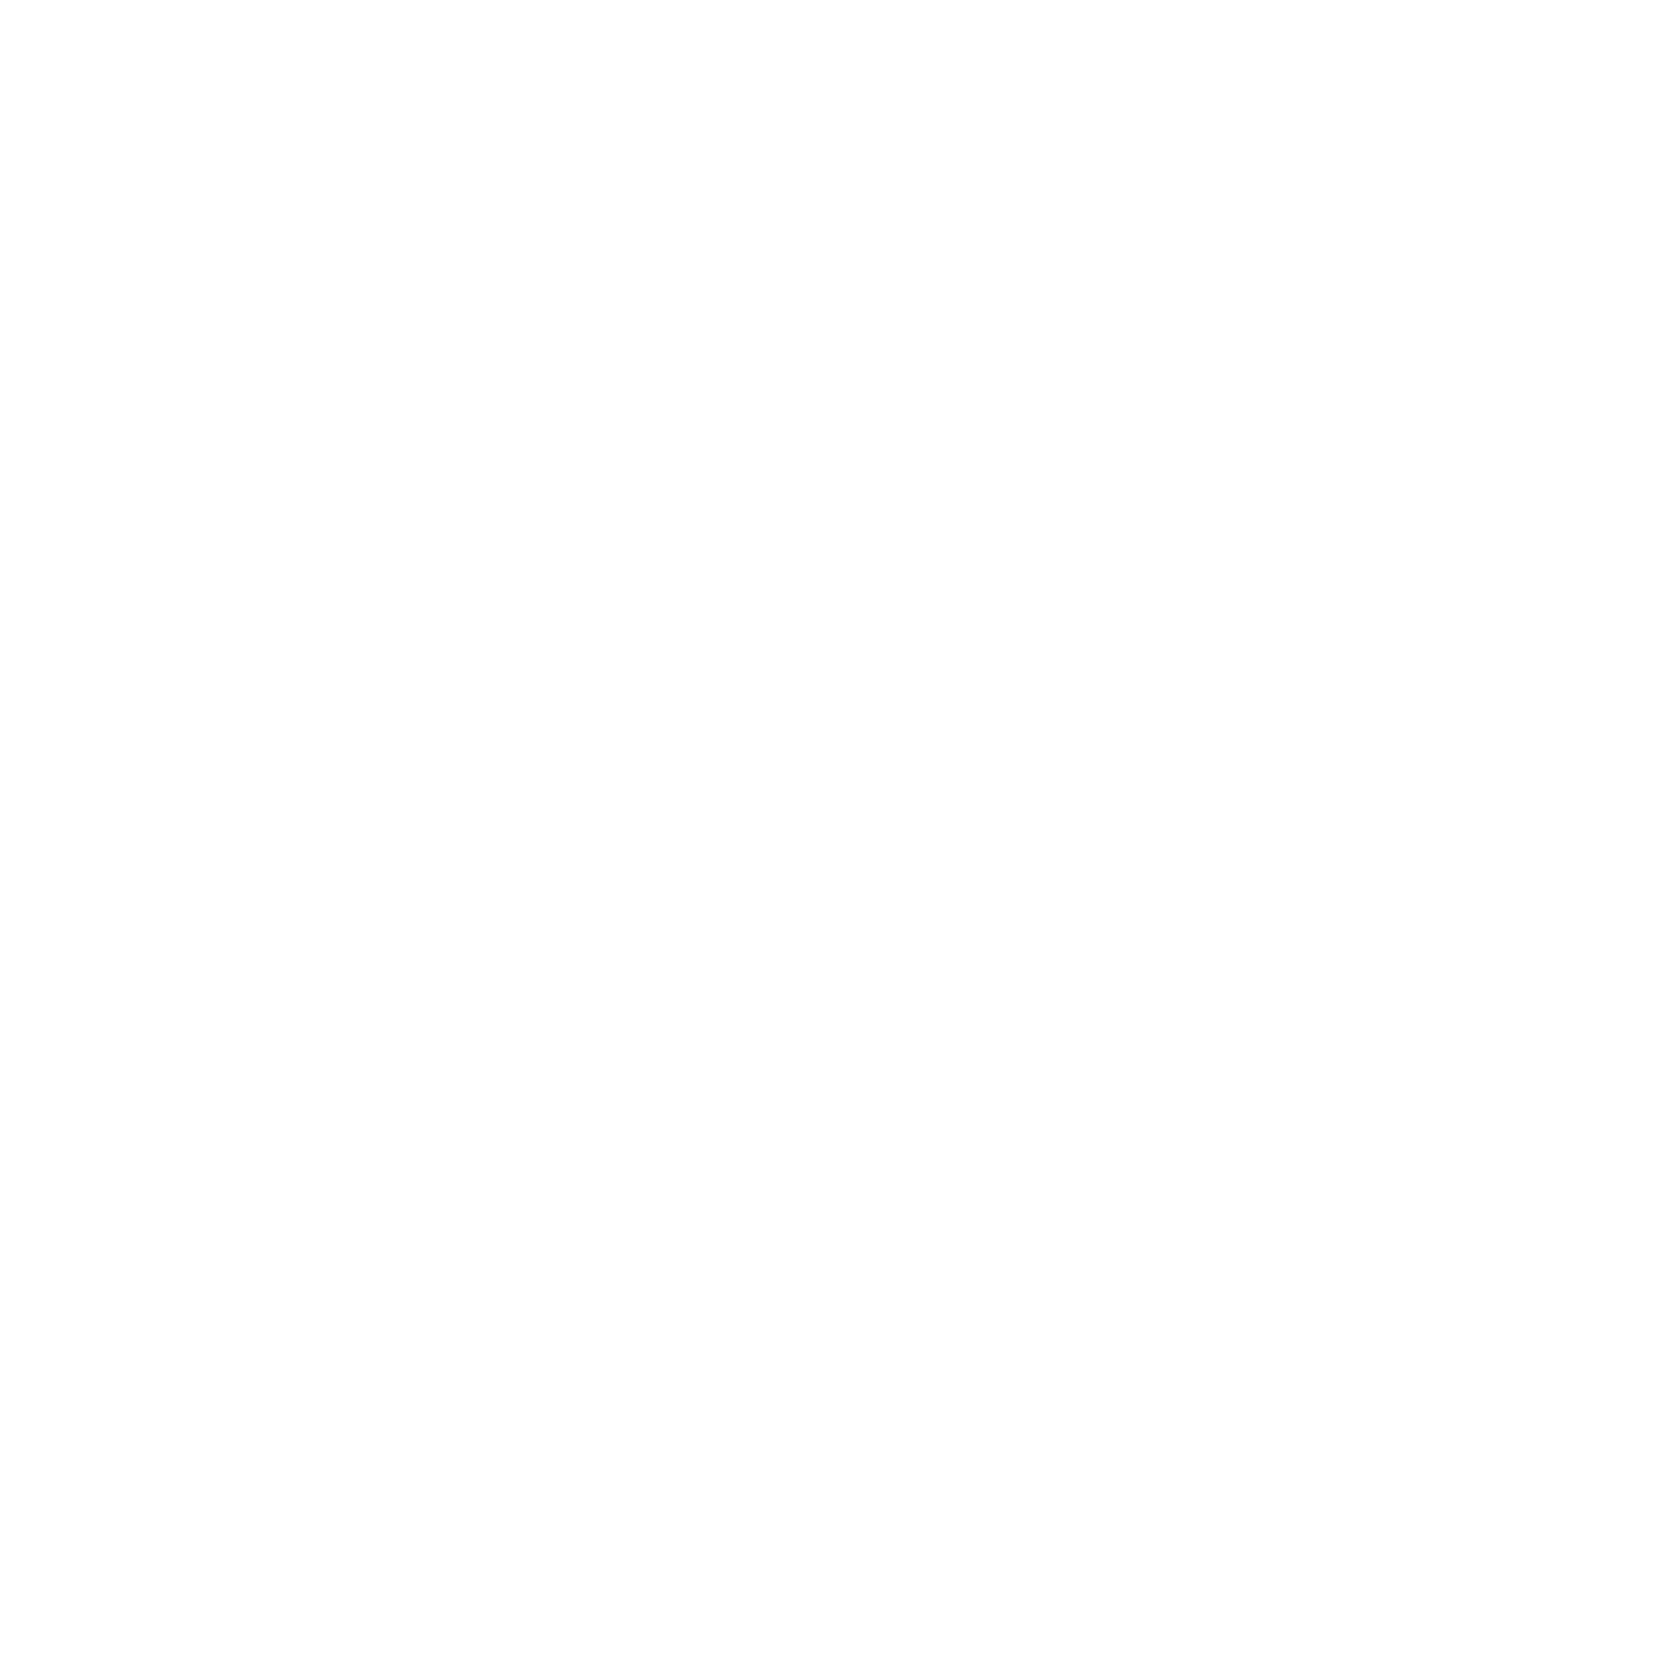

In [16]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)

plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
#options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))

Centering and scaling data matrix

PC_ 1 
Positive:  Gsta4, Tff1, S100a6, Mgst3, Gsta1, Krt19, Lgals2, Gstm1, Rps29, Tmsb10 
	   Gkn1, Gkn2, Sprr2a3, Rpl18a, Ftl1, Tmsb4x, Rpl37, Rps8, Rpl21, Ppia 
	   Car2, Cox5a, Rpl11, Rpl23, Sprr2b, Muc5ac, Rps2, Rpl13, Gsto1, Rpl39 
Negative:  Muc6, Malat1, Gkn3, Pgc, Gif, Aqp5, Slc9a3, Cacna2d1, Snhg18, Slc12a2 
	   Clcn3, Thbs1, Cela1, Col11a2, Cd44, Etv5, A4gnt, Sbno2, C4b, Maged1 
	   Rnf152, Furin, 2010007H06Rik, Clps, Itpr2, Sox9, Pigr, 5330417C22Rik, Cldn2, Cftr 
PC_ 2 
Positive:  Igfbp7, Serpinh1, Sparc, Col3a1, Col1a2, Vim, Col1a1, Cald1, Serping1, Col6a1 
	   C1s1, Col6a2, Tgfbi, Mustn1, Timp2, Emp3, Sparcl1, Bgn, Lgals1, Ly6a 
	   Gpx3, F2r, Htra1, Col5a1, Gm13889, Col6a3, Pdgfra, Rdx, Foxf1, Hspb1 
Negative:  Tff1, Tff2, Krt19, Gkn2, Mgst3, Gkn1, Gsta4, Lgals2, Gsta1, Muc5ac 
	   Dpcr1, Gsto1, Car2, Anxa10, Dmbt1, Lgals4, Sprr2a3, Ptgr1, Syt8, Agr2 
	   Psca, Slc5a5, Sprr2b, Phgr1, Oit1, Gsdma2, Sprr2a1, Tst, Sfn, Cotl1 
PC_ 3 
Positiv

PC_ 1 
Positive:  Gsta4, Tff1, S100a6, Mgst3, Gsta1 
Negative:  Muc6, Malat1, Gkn3, Pgc, Gif 
PC_ 2 
Positive:  Igfbp7, Serpinh1, Sparc, Col3a1, Col1a2 
Negative:  Tff1, Tff2, Krt19, Gkn2, Mgst3 
PC_ 3 
Positive:  Tff1, Dpcr1, S100a6, Krt19, Gkn1 
Negative:  Gkn3, Muc6, Tff2, Pgc, Cela1 
PC_ 4 
Positive:  Tff2, Agr2, Rpl13, Pgc, Muc6 
Negative:  Cpe, Map1b, Aplp1, Pcsk2, Hap1 
PC_ 5 
Positive:  Psca, Sptssb, Aldh3a1, Slc5a5, Muc5ac 
Negative:  Top2a, Mki67, Hmgb2, Tubb5, Tuba1b 


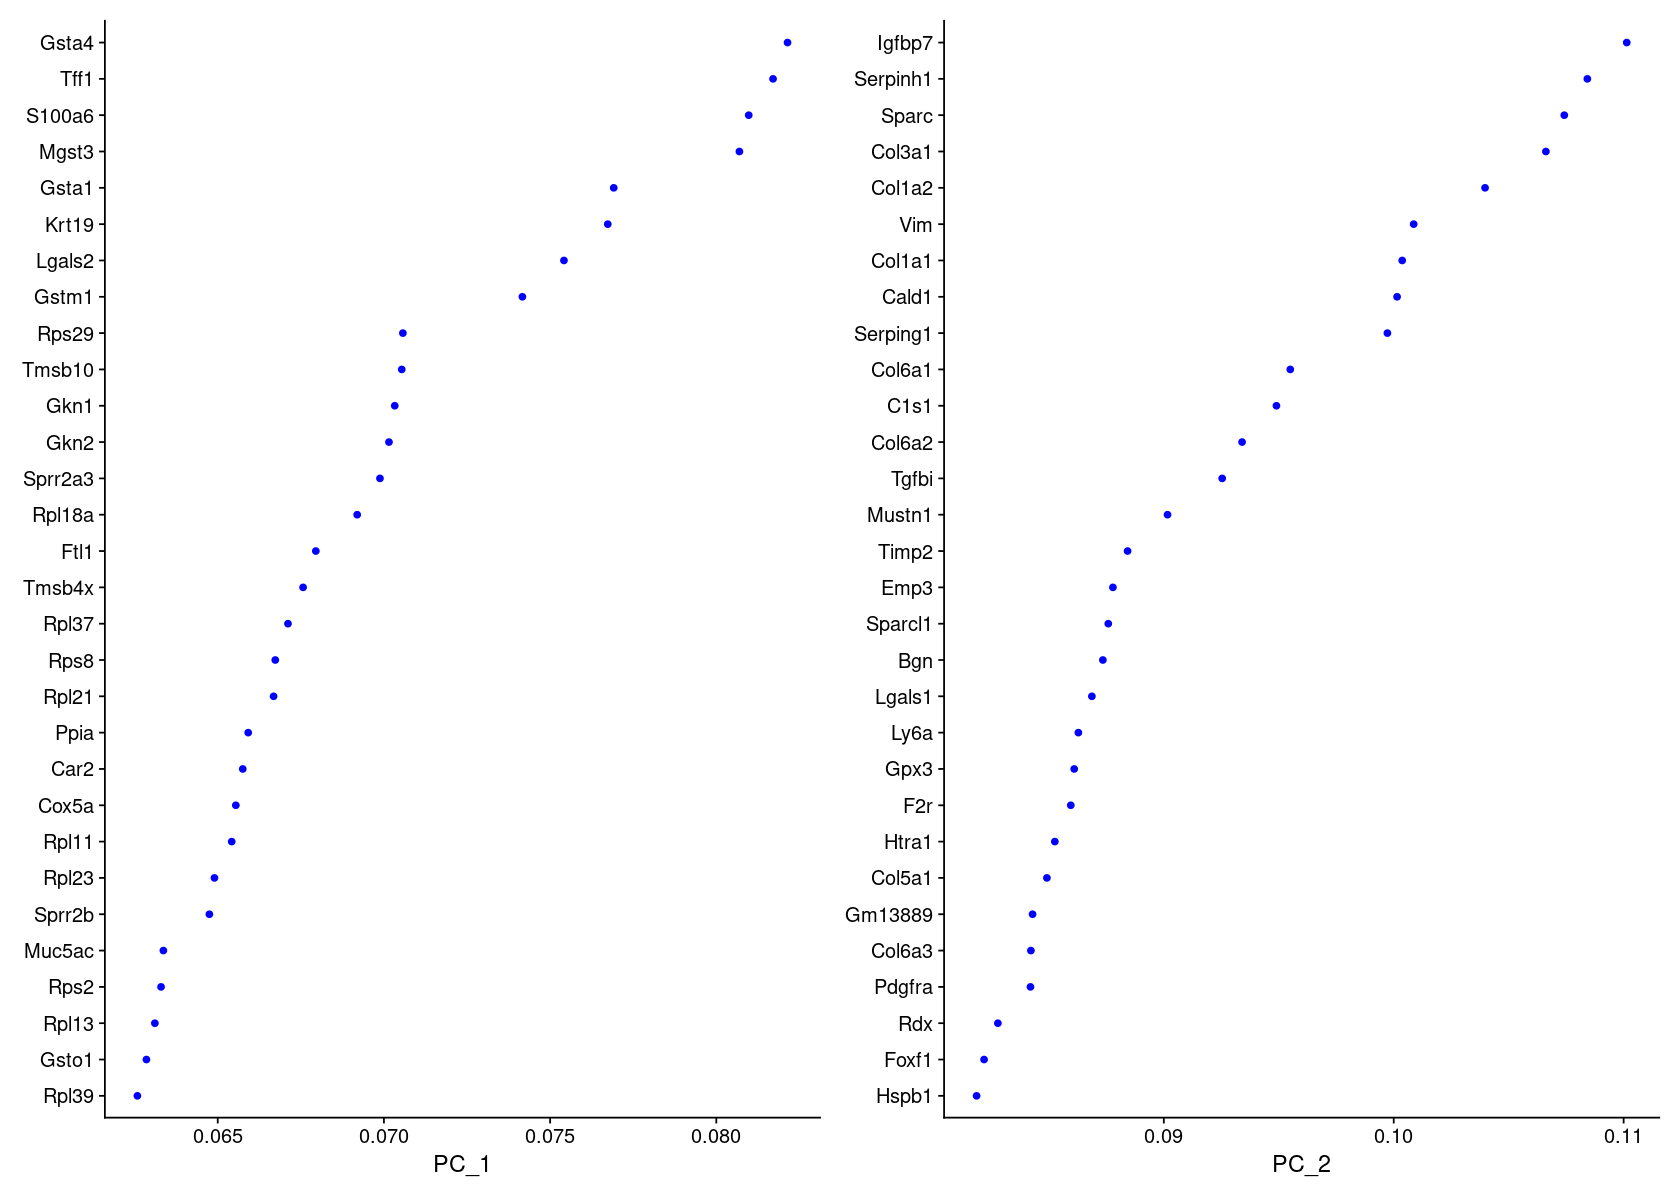

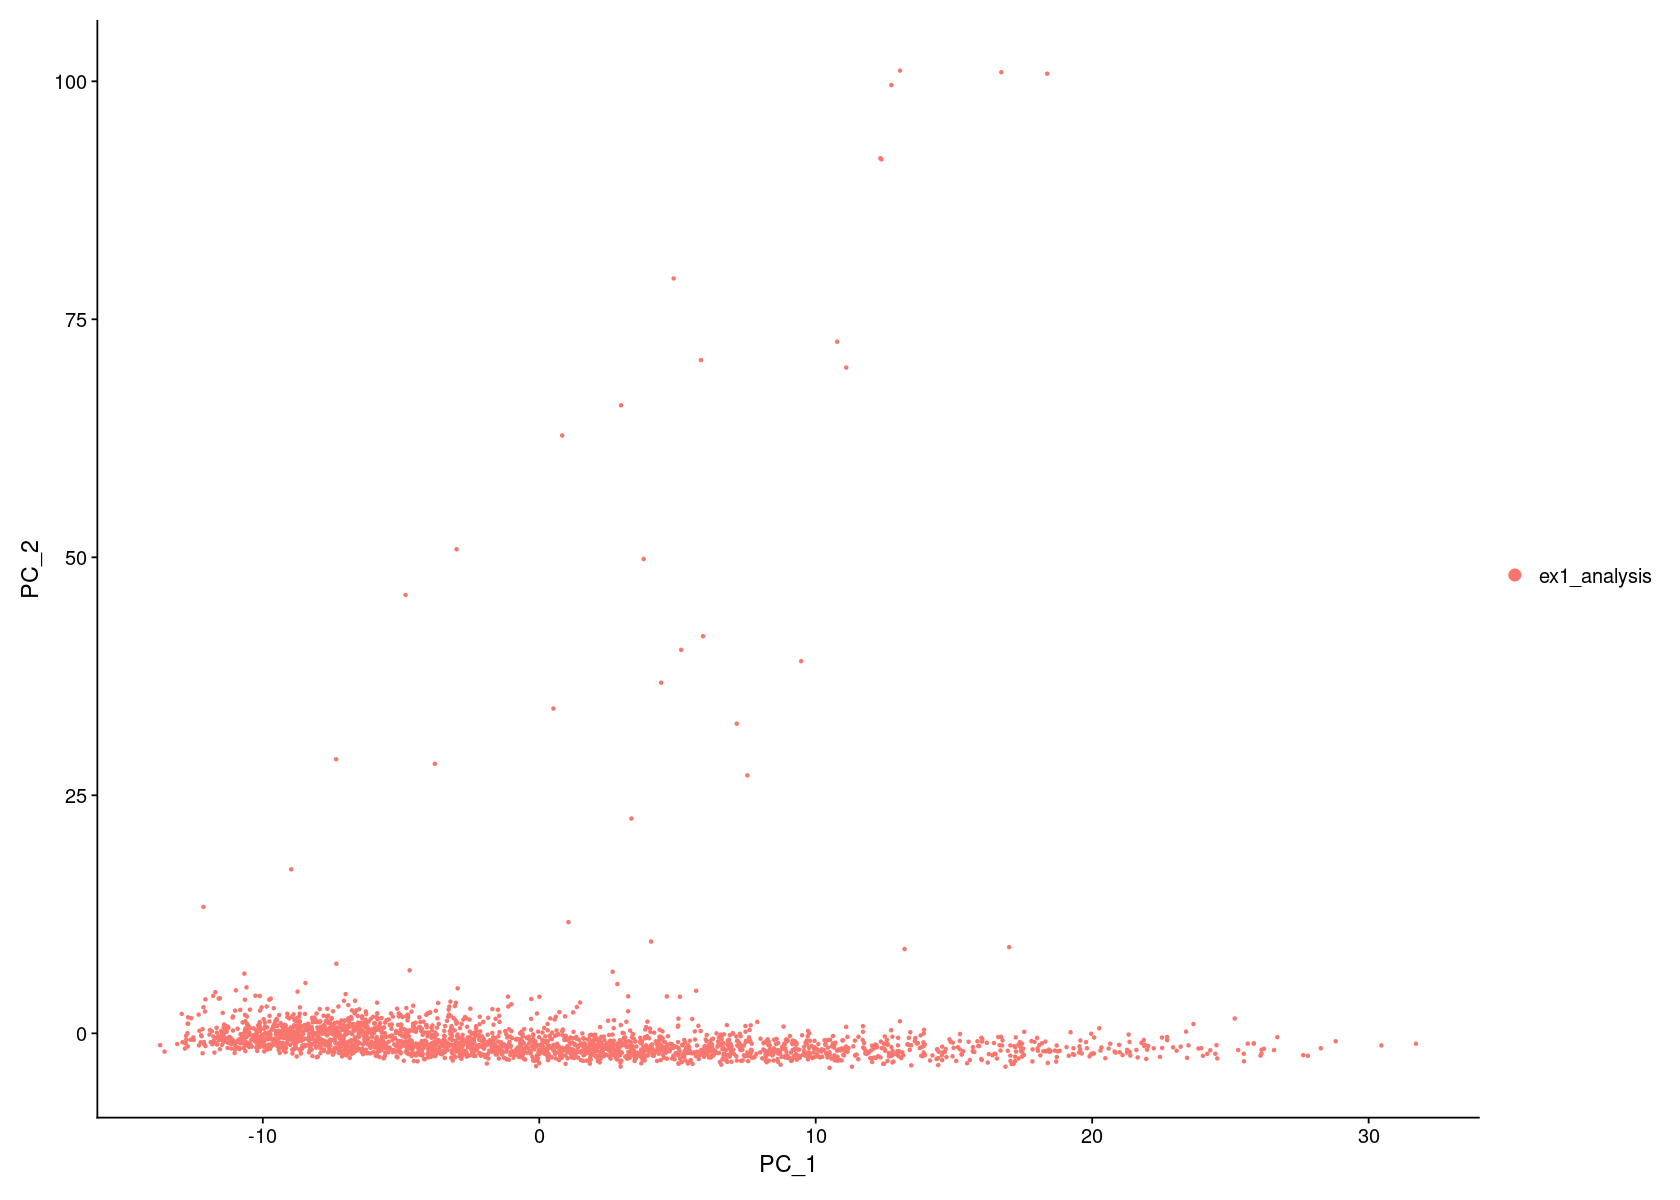

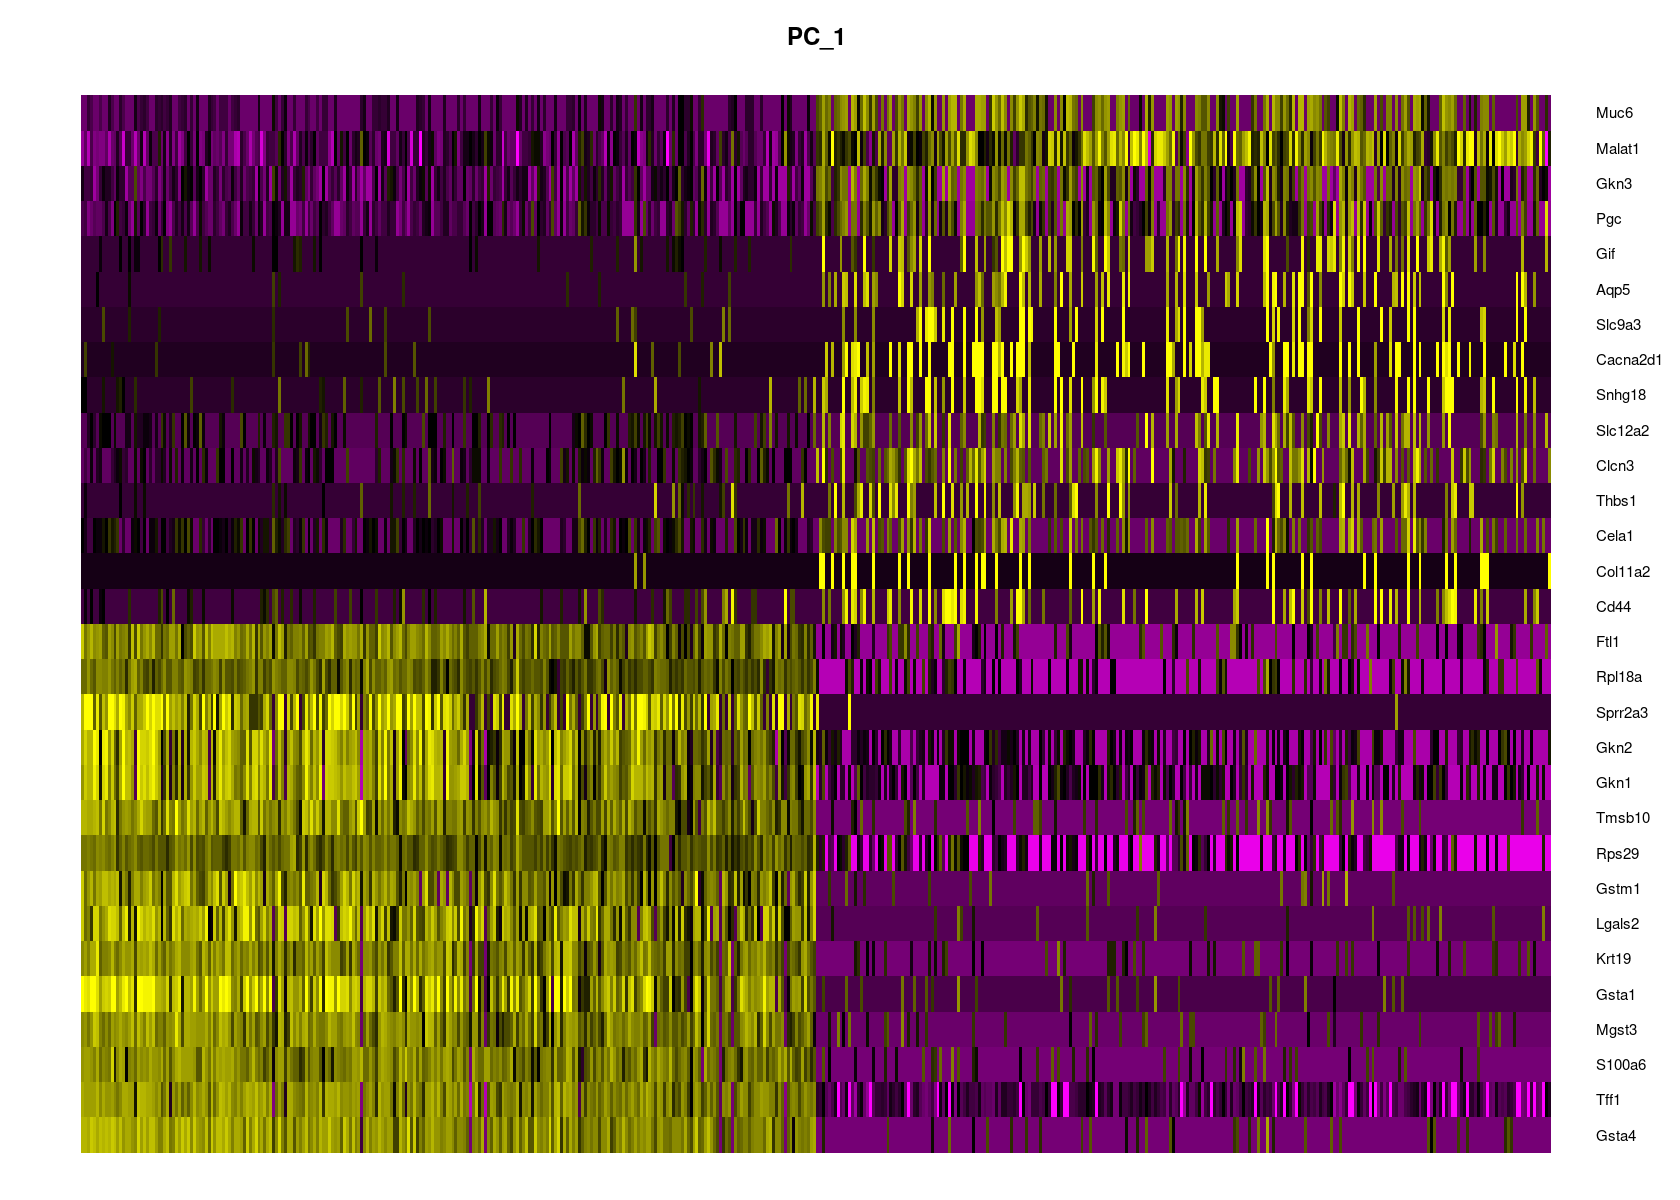

In [13]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, features=all.genes)

tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")

DimPlot(tmp, reduction="pca")

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)

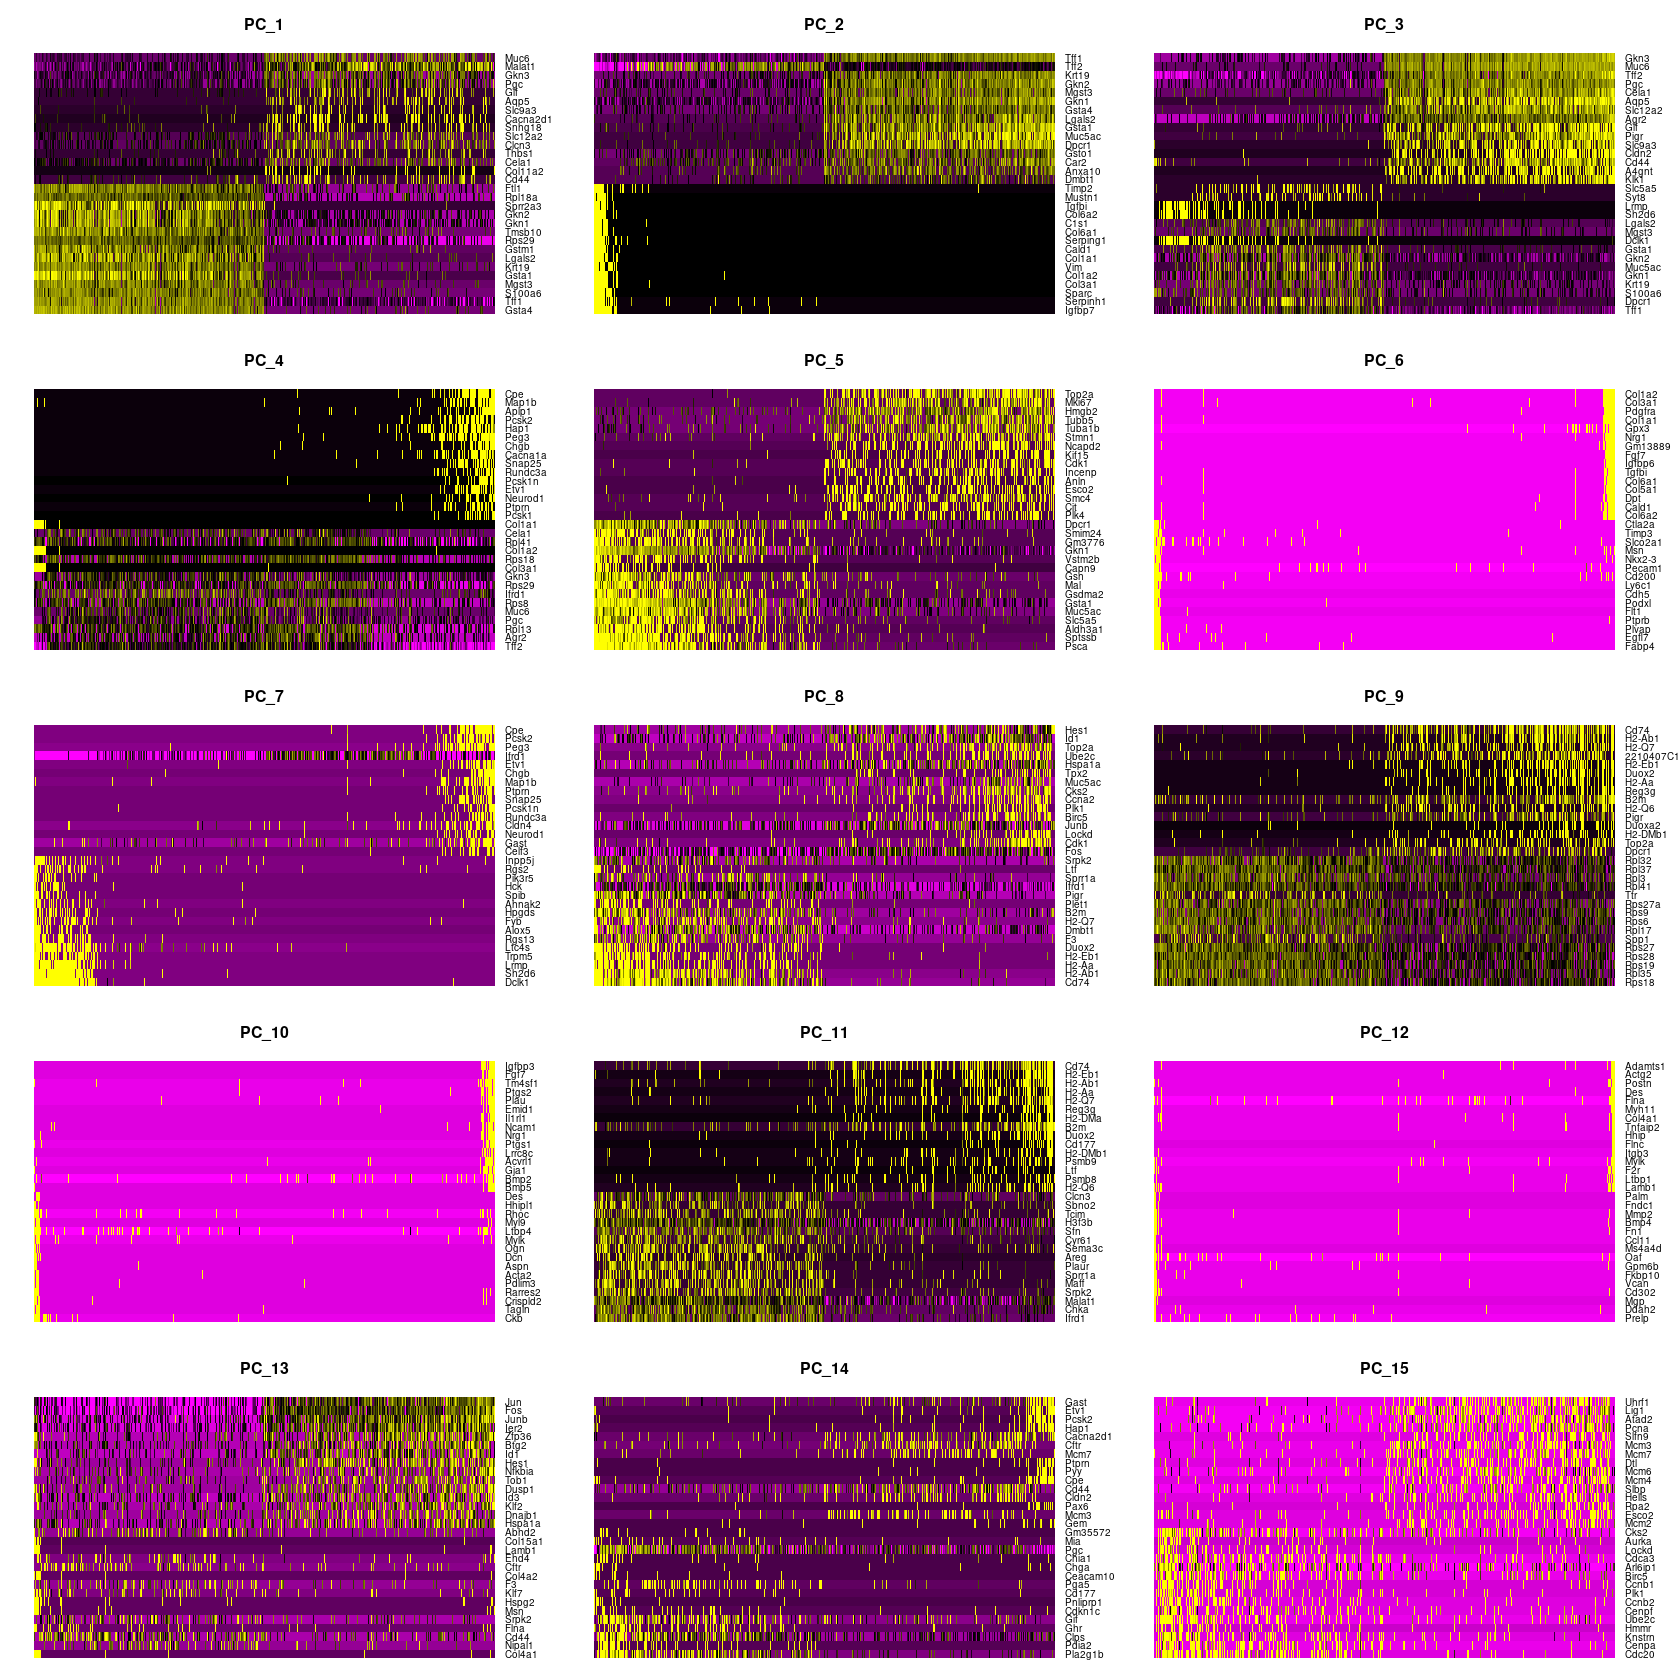

In [14]:
options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)

Warning message:
“Removed 28272 rows containing missing values (geom_point).”


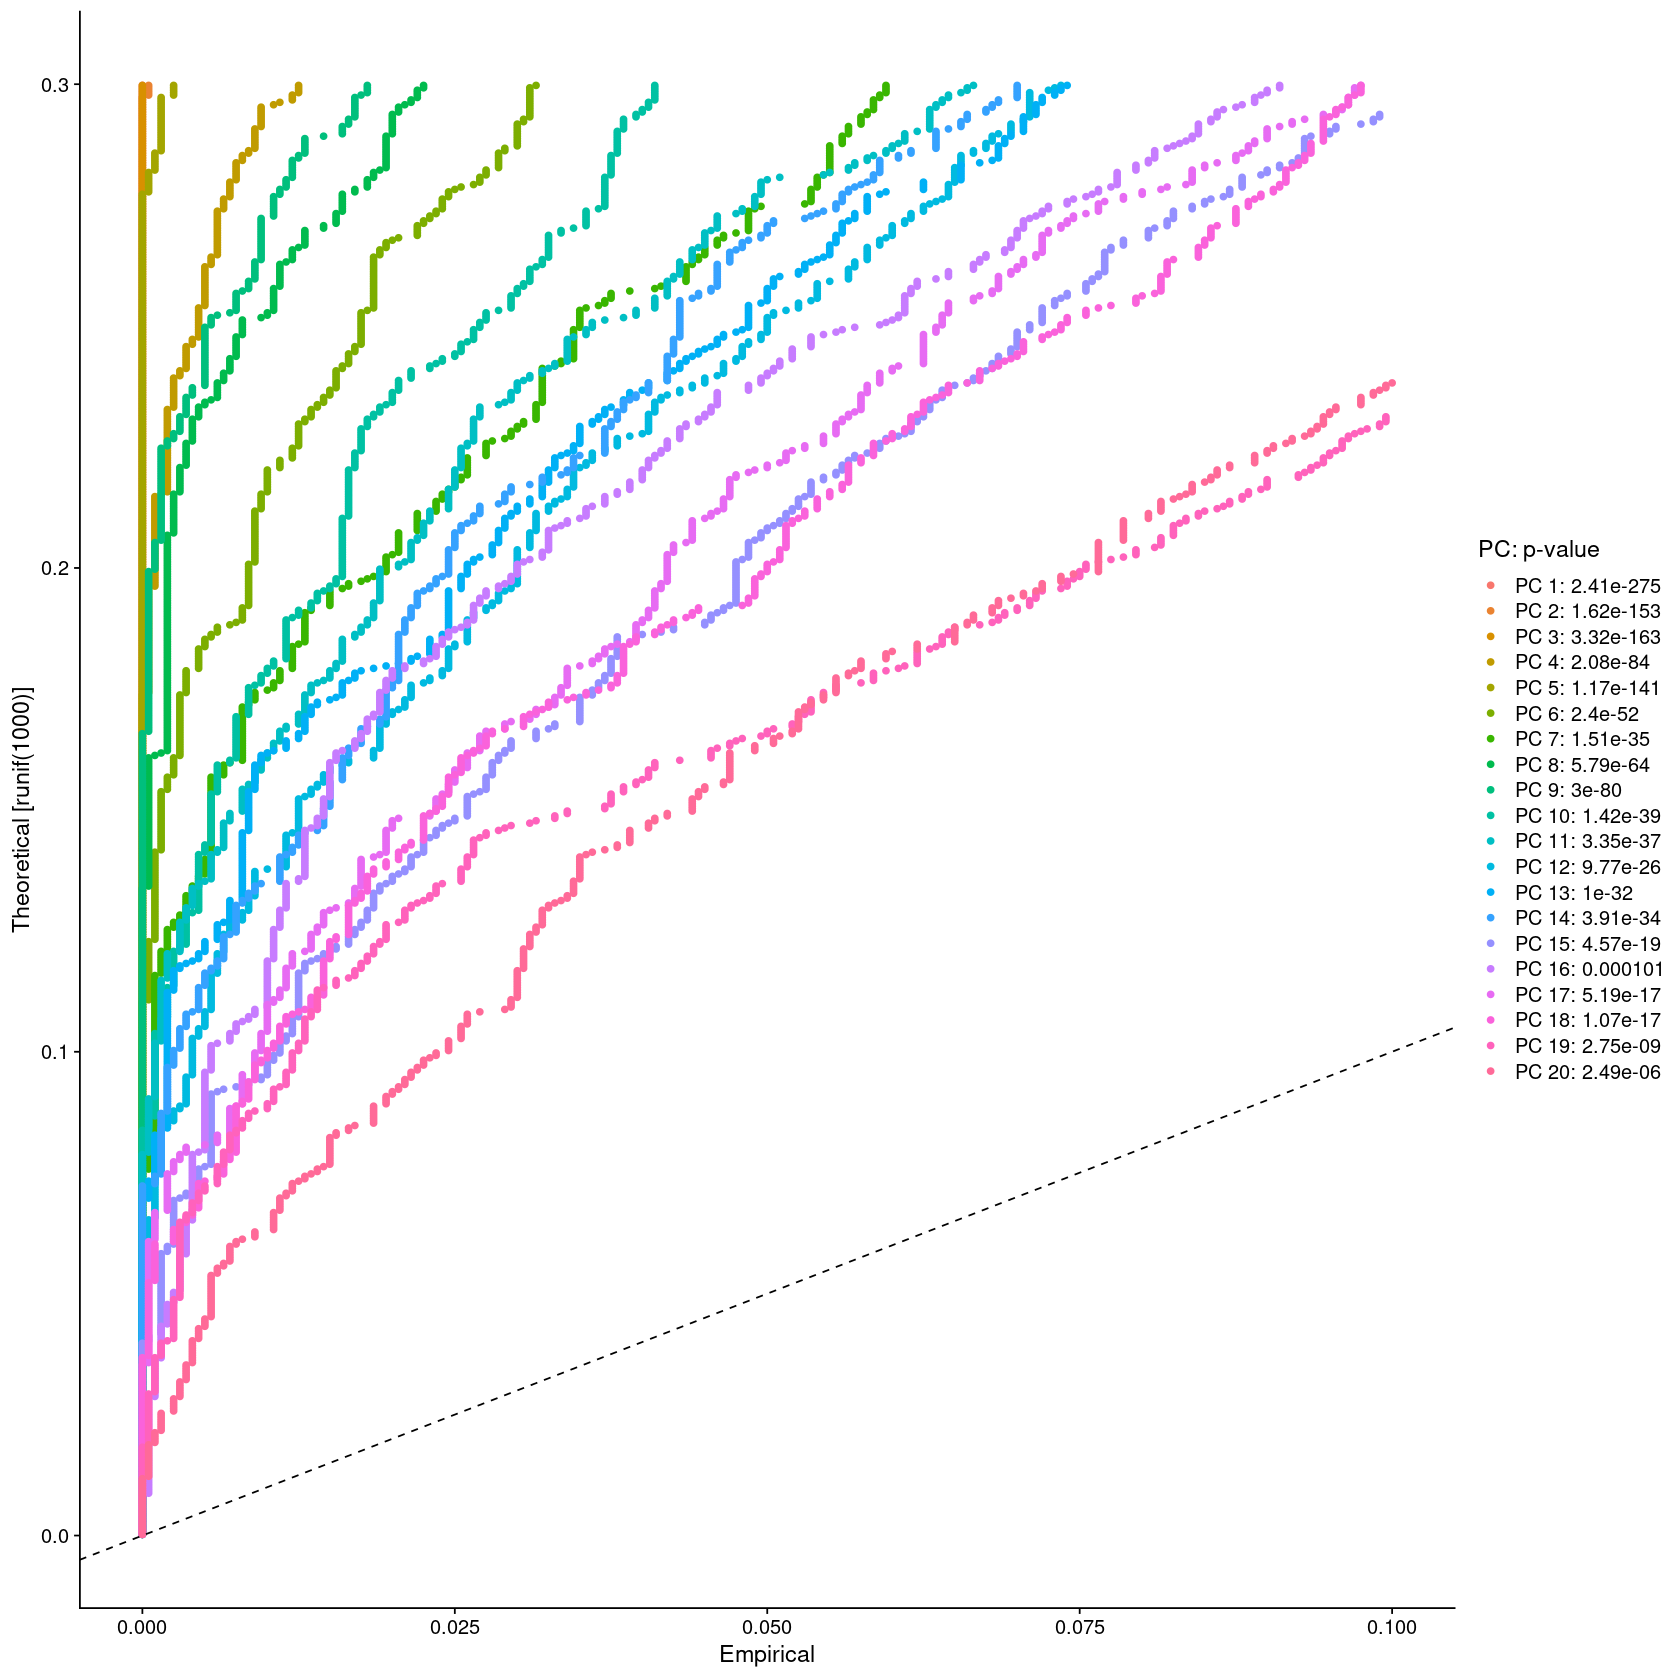

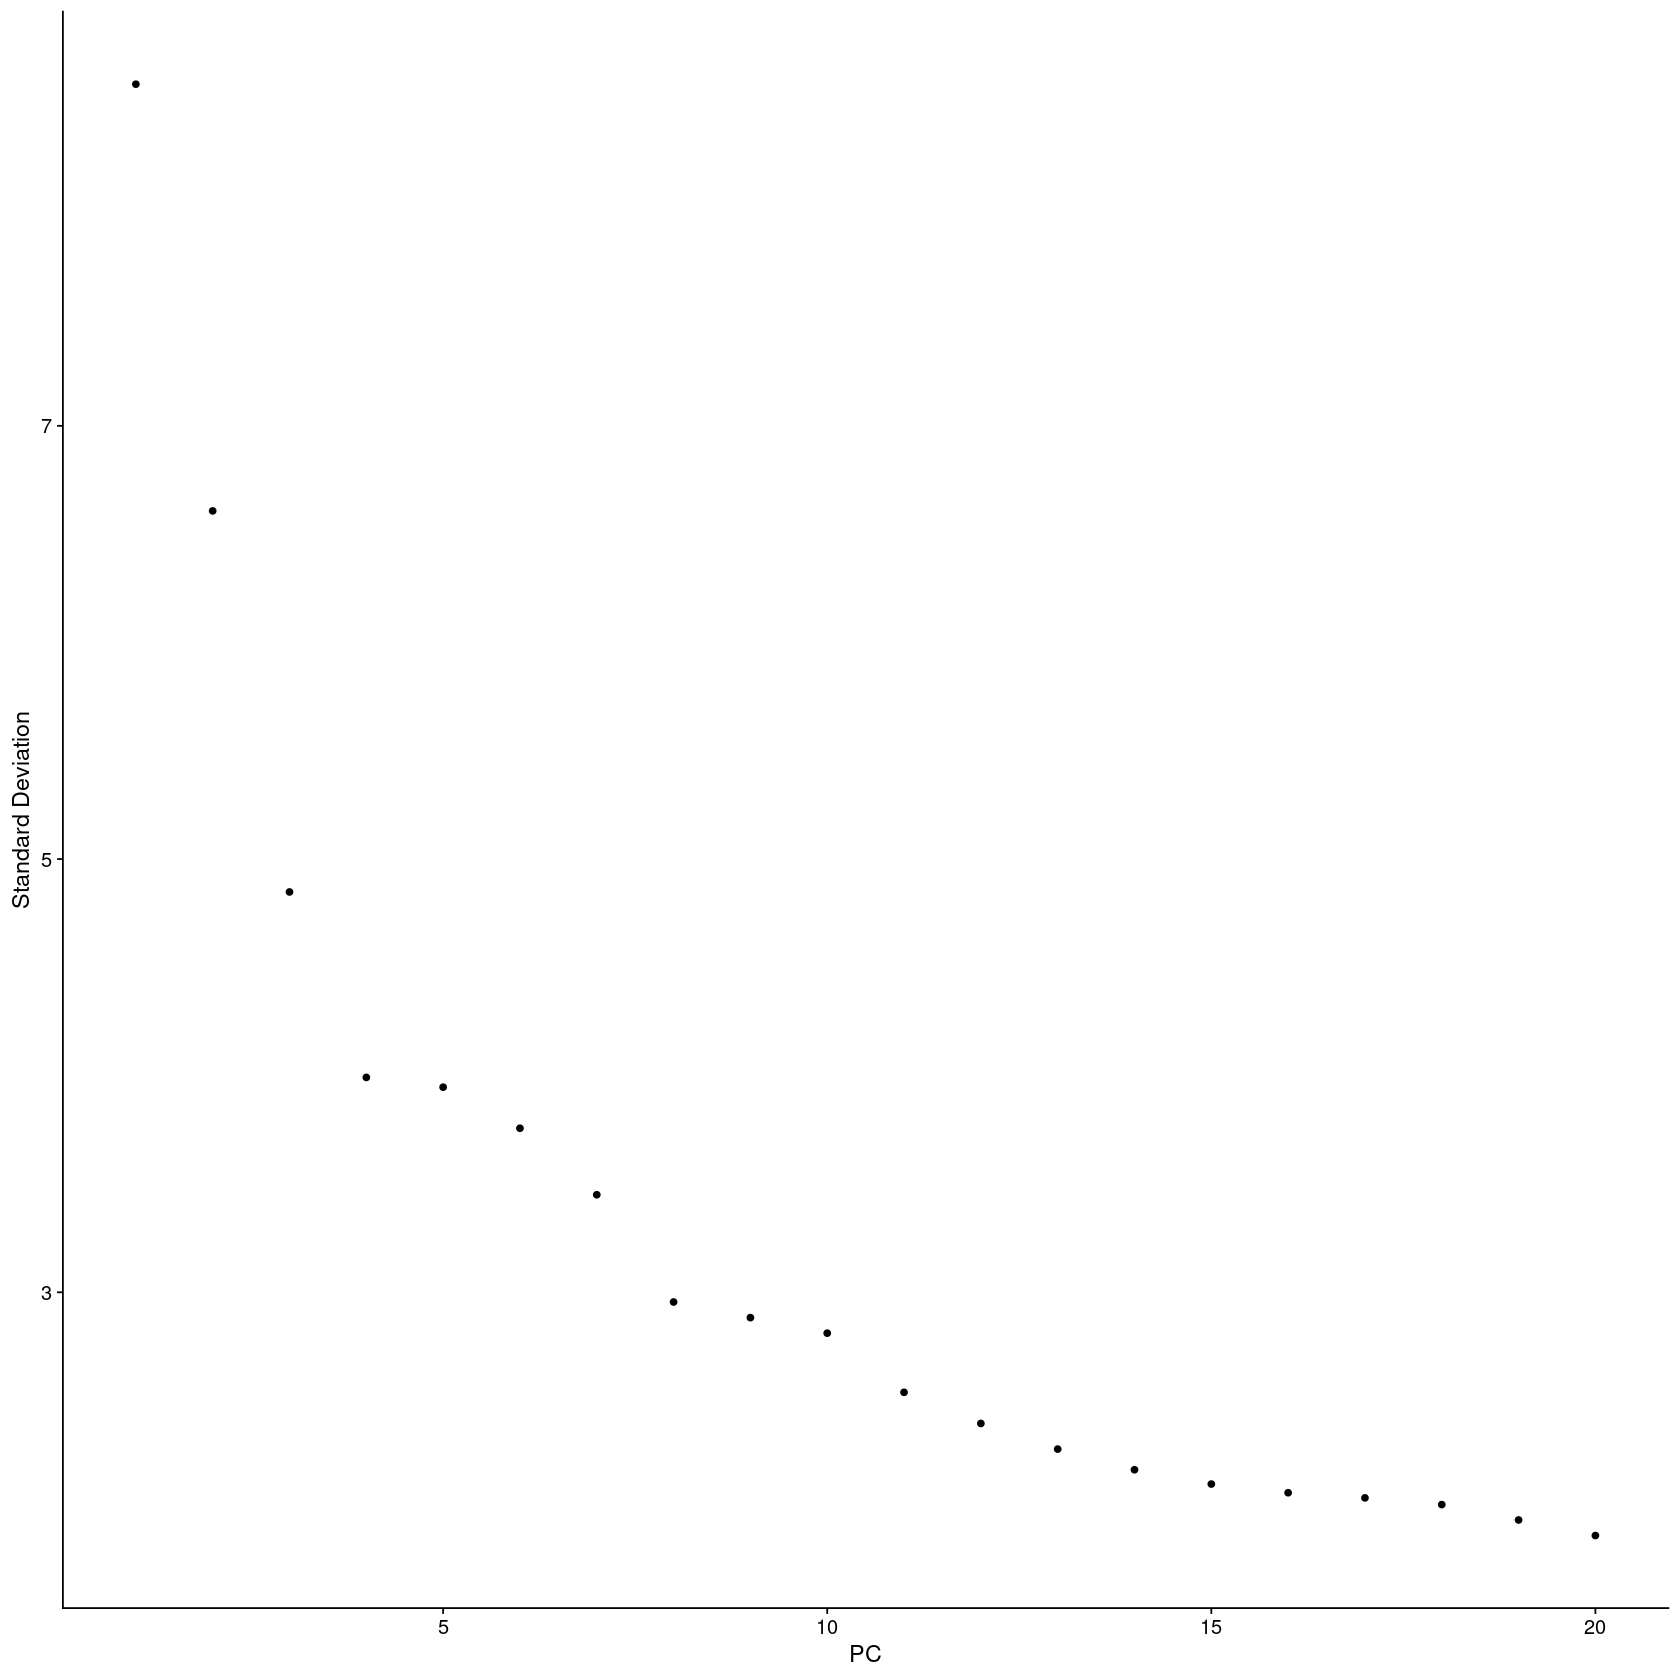

In [17]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)

ElbowPlot(tmp)

In [18]:
arg10 <- 20 #maximum PC

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2598
Number of edges: 85876

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7600
Number of communities: 11
Elapsed time: 2 seconds


AAACCTGTCGGCTTGG-1 AAACGGGAGCTATGCT-1 AAACGGGAGTCACGCC-1 AAACGGGCAAAGAATC-1 
                 2                  2                  1                  0 
AAACGGGCACCGCTAG-1 
                 2 
Levels: 0 1 2 3 4 5 6 7 8 9 10

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:10:44 UMAP embedding parameters a = 0.9922 b = 1.112

23:10:44 Read 2598 rows and found 20 numeric columns

23:10:44 Using Annoy for neighbor search, n_neighbors = 30

23:10:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

23:10:45 Writing NN index file to temp file /tmp/RtmpxFfrRK/file79cc21f1337b

23:10:45 Searching Annoy index using 1 thread, search_k = 3000

23:10:50 Annoy recall = 100%

23:10:51 Commencing smooth kNN distance calibration using 1 thread

23:10:51 Initializing fr

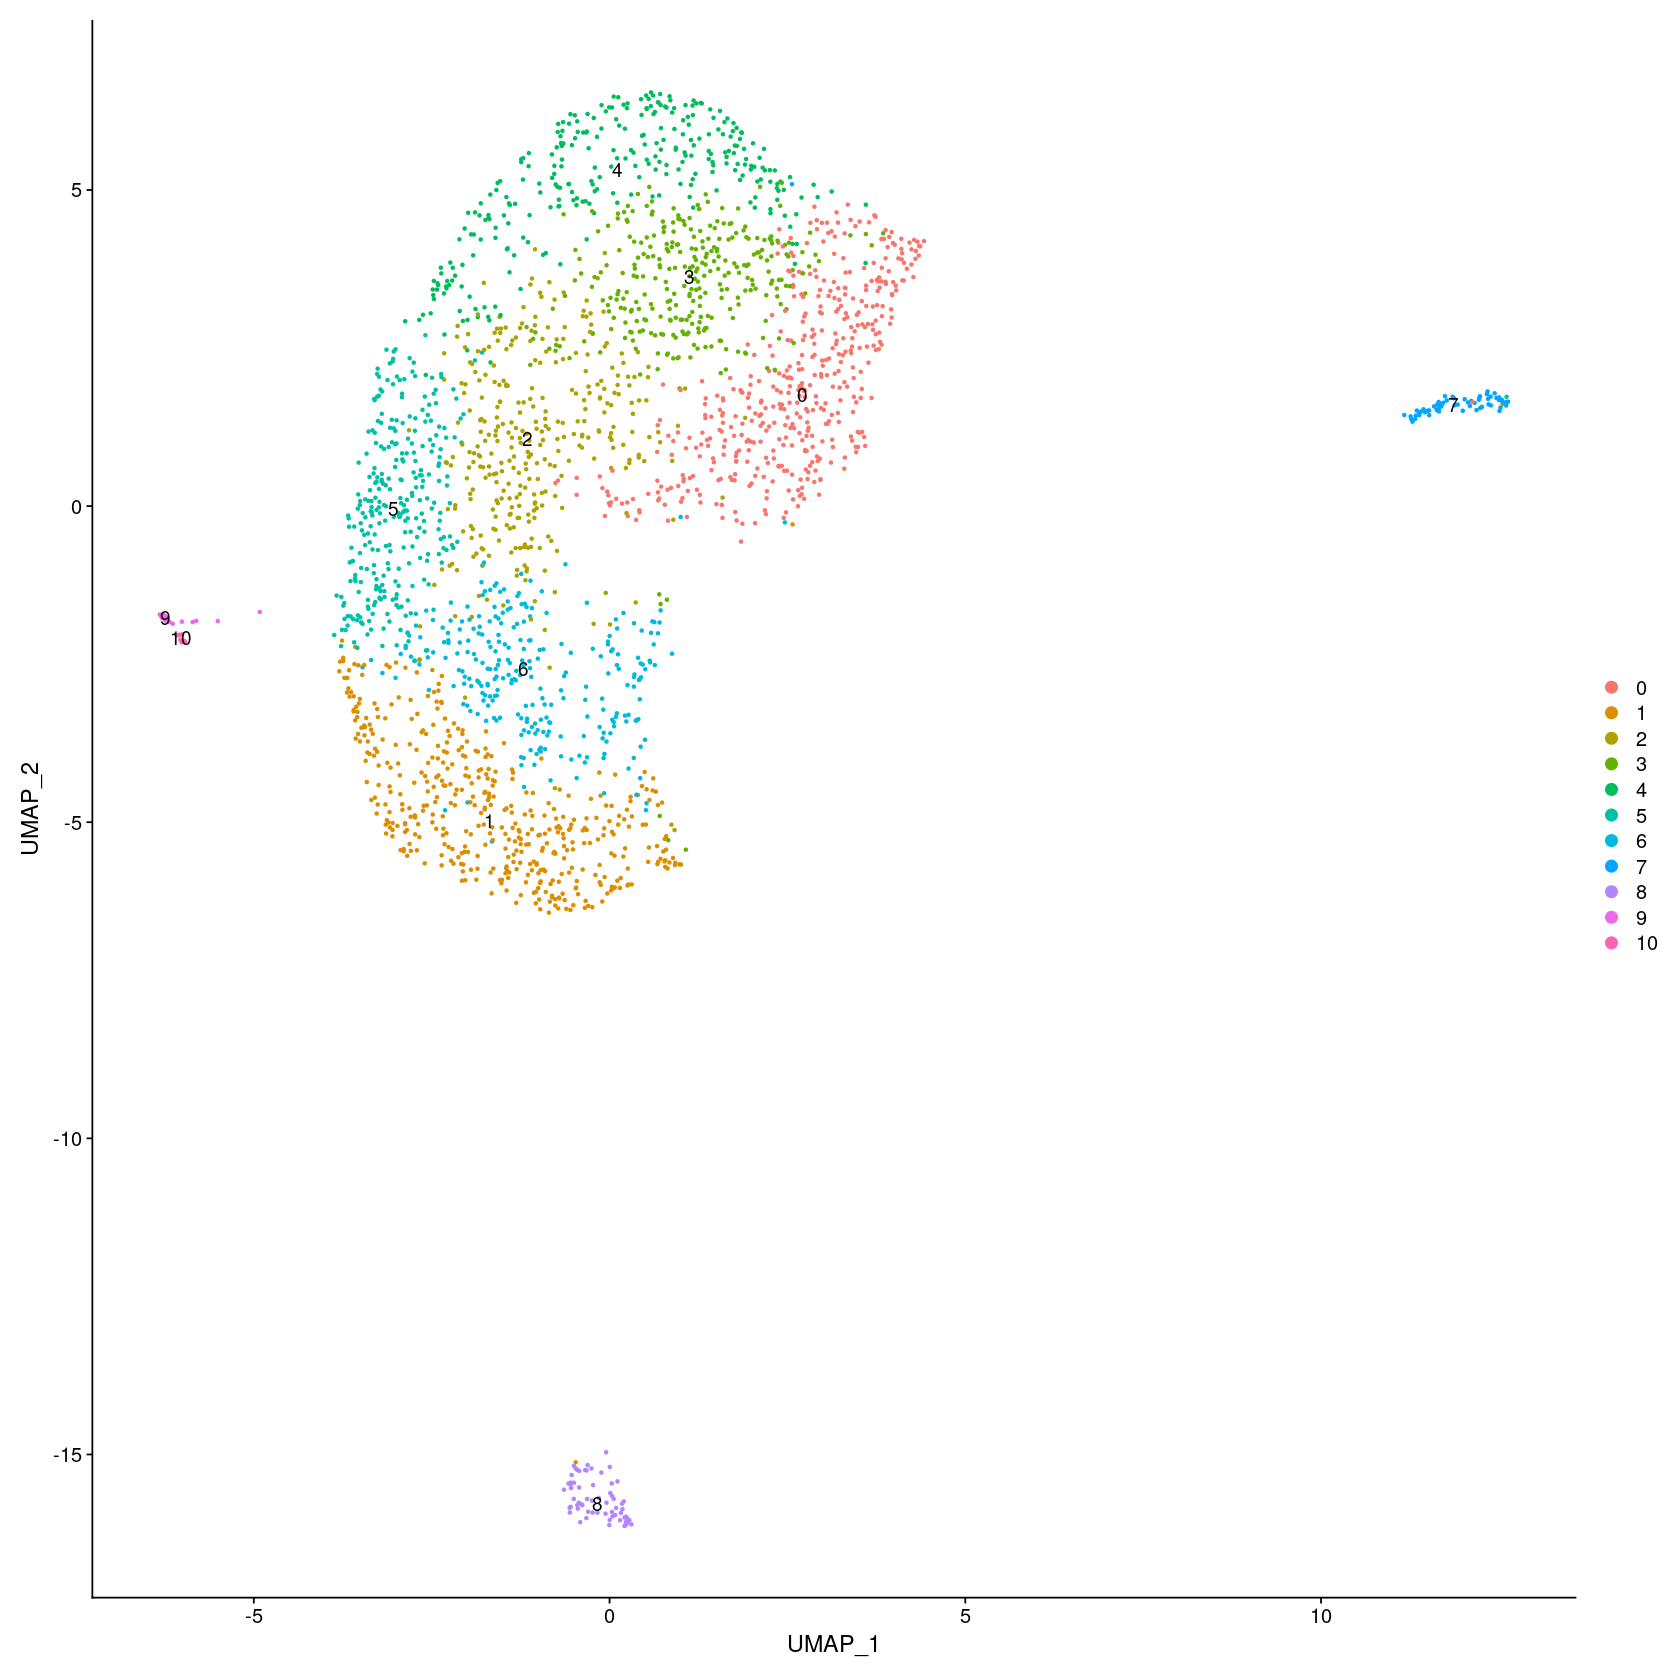

In [19]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10)
DimPlot(tmp, reduction="umap", label=TRUE)

In [20]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
2.457812e-212,1.2135255,0.572,0.035,3.462074e-208,0,Top2a
1.731980e-142,1.0761608,0.736,0.170,2.439666e-138,0,Hmgb2
6.461141e-213,2.2037910,0.985,0.525,9.101163e-209,1,Muc6
4.908708e-155,2.1655239,0.719,0.166,6.914405e-151,1,Gif
1.398223e-20,0.6776880,0.479,0.275,1.969537e-16,2,Srpk2
2.357627e-19,0.6758520,0.443,0.251,3.320953e-15,2,Baiap2
5.486530e-43,0.6698849,0.851,0.459,7.728326e-39,3,Gstm1
8.401444e-38,0.6574981,0.806,0.433,1.183427e-33,3,Lgals2
2.265326e-158,1.9673450,0.970,0.363,3.190939e-154,4,Gsta1


In [21]:
write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

In [23]:
saveRDS(tmp, file=arg04)

In [ ]:
#sample <- readRDS(file=args04)

In [ ]:
#From CellMarker
#cancer_marker <- list('CD44', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#   p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}

In [ ]:
#From Dr.Nagasawa slide
#cancer_marker <- list('VIM', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#    p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}